In [11]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

In [12]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data", header= None)
df.head()

,0,1,2,3,4,5,6
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [ ]:
df.describe()

In [ ]:
df[6].value_counts()

In [18]:
df[0].replace(['a','b','c','d','e','f','g','h'],[8,7,6,5, 4 ,3 ,2 , 1], inplace=True)

df[2].replace(['a','b','c','d','e','f','g','h'],[8,7,6,5, 4 ,3 ,2 , 1], inplace=True)
df[4].replace(['a','b','c','d','e','f','g','h'],[8,7,6,5, 4 ,3 ,2 , 1], inplace=True)

In [19]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [20]:
samples

[(      0  1  2  3  4  5
  5976  5  3  4  2  6  6
  2703  5  2  7  1  8  4
  1704  5  3  5  5  7  1
  5061  8  1  8  3  4  1
  2233  5  3  7  8  8  5
  ...  .. .. .. .. .. ..
  6062  5  3  4  8  2  3
  8449  6  2  5  7  3  3
  7515  5  2  8  4  4  7
  6800  6  3  7  2  1  5
  7811  5  2  6  6  3  3
  
  [6787 rows x 6 columns],
        0  1  2  3  4  5
  2091  5  2  7  6  2  1
  687   5  3  7  2  8  3
  8715  5  1  8  3  7  5
  6370  6  1  4  2  3  8
  7436  5  1  1  8  7  8
  ...  .. .. .. .. .. ..
  3274  6  1  6  5  1  1
  3764  5  3  7  3  2  2
  3240  6  1  7  4  3  1
  1085  5  3  1  4  5  1
  8786  5  1  8  6  5  6
  
  [2910 rows x 6 columns],
  5976      eleven
  2703       seven
  1704        five
  5061         ten
  2233         six
            ...   
  6062      eleven
  8449    fourteen
  7515    thirteen
  6800      twelve
  7811    thirteen
  Name: 6, Length: 6787, dtype: object,
  2091         six
  687         draw
  8715    fourteen
  6370      twelve
  7436    thirt

In [21]:
def fitnessfunction(X_train, X_test, y_train, y_test, kernel, c, gamma):
    model= svm.SVC( C= c, kernel= kernel, gamma=gamma)
    model.fit(X_train, y_train)
    print("fit")
    predicted = model.predict(X_test)
    accuracy = round(np.mean(y_test == predicted) * 100, 2)
    return accuracy 

In [22]:
nsamples = 10
accuracies = []
params= []
iteration= 100

kernelList = ['linear','rbf', 'sigmoid']
df_sample= pd.DataFrame(columns=['sample#', 'best accuracy', 'c', 'gamma', 'kernel'])

for i in range(nsamples):
    bestC = 0 
    bestGamma = 0 
    bestAccuracy=0
    X_train, X_test, y_train, y_test = samples[i]
    
    print("Iterating on sample ", i+1)
    for j in range(1, iteration+1):
        print("iteration ",j)
        kernel= np.random.choice(kernelList)
        C = np.random.uniform(0,10)
        gamma = np.random.uniform(0, 10)
        print(kernel , C, gamma)
        accuracy= fitnessfunction(X_train, X_test, y_train, y_test, kernel, C, gamma)
        if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestC= C
                bestGamma= gamma
                bestKernel= kernel

                    
    accuracies.append(bestAccuracy)
    params.append([bestC, bestGamma, bestKernel])

    df_sample.loc[len(df_sample.index)] = [i+1, bestAccuracy, bestC, bestGamma, bestKernel]
print("Done iterating!\n")

Iterating on sample  1
iteration  1
linear 8.11926543690567 3.9309519708199216
fit
iteration  2
linear 1.384167176598311 3.3255549624182157
fit
iteration  3
linear 9.71657488784863 1.1544250622531593
fit
iteration  4
sigmoid 5.186801948001728 8.390820635901115
fit
iteration  5
rbf 1.6200248698808106 4.7311981585142515
fit
iteration  6
rbf 6.166862199752271 2.373290287319091
fit
iteration  7
sigmoid 6.557172129030211 7.956150033175428
fit
iteration  8
rbf 8.226628985591054 0.6123003409043459
fit
iteration  9
linear 1.2823318073483347 0.07597265107964102
fit
iteration  10
sigmoid 8.73351225964362 4.955512504376811
fit
iteration  11
linear 8.949554534853643 7.841772286602874
fit
iteration  12
rbf 7.207956875901321 1.879150577112788
fit
iteration  13
linear 7.152943671013878 6.725048085133447
fit
iteration  14
rbf 2.452011920589494 4.128795207835982
fit
iteration  15
linear 8.603362326513832 2.274394729284425
fit
iteration  16
rbf 2.877649255119329 0.2645465224314991
fit
iteration  17
line

In [23]:
print(df_sample)

   sample#  best accuracy         c     gamma kernel
0        1          88.25  8.226629  0.612300    rbf
1        2          88.63  7.394568  0.579608    rbf
2        3          88.11  4.534820  0.501943    rbf
3        4          86.43  2.527403  0.380832    rbf
4        5          87.04  1.448029  0.756275    rbf
5        6          87.77  6.424191  0.549651    rbf
6        7          87.49  5.377707  0.820058    rbf
7        8          87.32  8.902381  0.231336    rbf
8        9          88.18  9.466856  0.260369    rbf
9       10          87.46  6.195016  0.820397    rbf


In [24]:
X_train, X_test, y_train, y_test = samples[df_sample['best accuracy'].idxmax()]

In [25]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=df_sample['kernel'].iloc[df_sample['best accuracy'].idxmax()], 
                                                        C=df_sample['c'].iloc[df_sample['best accuracy'].idxmax()],
                                                        gamma=df_sample['gamma'].iloc[df_sample['best accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1

In [26]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

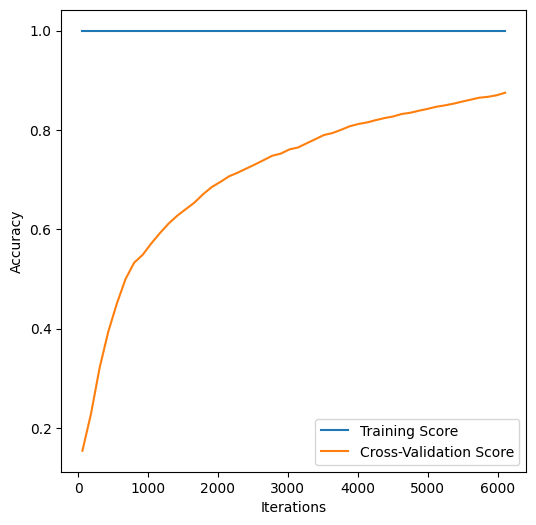

In [27]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()